# Loading stuff

In [1]:
# Loading libraries
import numpy as np
import pandas as pd # For data structuring
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # Add-on toolkit for plt

In [2]:
# Loading data
tips = sns.load_dataset('tips')
tb = tips['total_bill']

# Ignore some annoying warnings
import warnings
warnings.filterwarnings('ignore')

# VIDEO 1: The Grammar of Graphics

## Matplotlib and the Grammar of Graphics (I/IV)
*Where do I start when making a plot?*

We will begin with the fundamental and flexible way. We start with our plotting canvas.

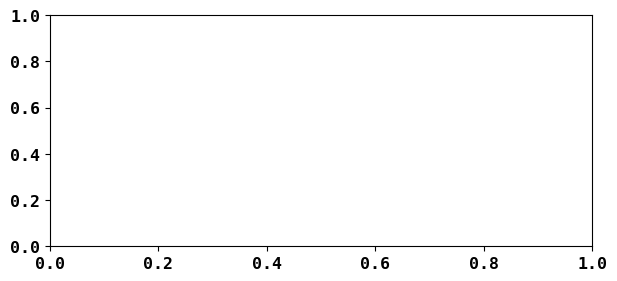

In [6]:
fig, ax = plt.subplots(figsize = (7, 3)) # create placeholder for plot

`fig` and `ax` are interrelated, but it is important to distinguish the two from each other:
- `ax` contains most of the chart content as objects: 
    -  grid axes, labels, shapes we draw etc.
- `fig` the actual plot which is displayed (export to pdf etc.)

## Matplotlib and the Grammar of Graphics (II/IV)
*Is there a way to change the fundamental style of the plot?*

Yes, you can set a plotting style. Usually, however, you will not set this explicitly. There are lots of styles...

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'bright', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'light', 'muted', 'no-latex', 'notebook', 'pgf', 'retro', 'scatter', 'science', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'std-colors', 'tableau-colorblind10', 'vibrant']


Can recomment `ggplot` or simply `default` as tyles.

## Matplotlib and the Grammar of Graphics (III/IV)
*Are there any other defaults, that can be changed?*

A lot. With `plt.rc()`, we can change all sorts of default plotting styles. Consider the following:

In [8]:
plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot, default

plt.rc('figure', figsize=(6, 3)) # set default size of plots

font_options = {'family' : 'monospace', # define default font options
                'weight' : 'bold',
                'size'   : 12}

plt.rc('font', **font_options) # set default font options

## Matplotlib and the Grammar of Graphics (IV/IV)
*Now, let's take a look at our canvas*

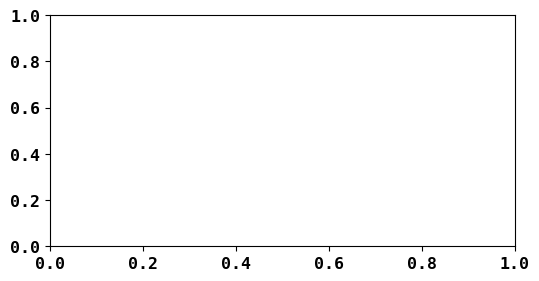

In [9]:
fig, ax = plt.subplots() # recreate placeholder for plot

## Plotting Something on Our Canvas (I/III)

Now, we want to plot something on our canvas! Luckily, Seaborn comes with some illustrative datasets. 

We load `tips` and explore it a bit...

In [ ]:
tips = sns.load_dataset('tips')
print('Number of rows:',len(tips),'\n')
print(tips.head(5))

## Plotting Something on Our Canvas (II/III)
We will now draw plots of the tips data on the canvas. Let's plot the *numeric* variable `total_bill`:

In [ ]:
tb = tips['total_bill']

fig, ax = plt.subplots()
ax.hist(tb)
ax.plot()

## Plotting Something on Our Canvas (III/III)
Let's make some additional variable-specific customization and display:

[]

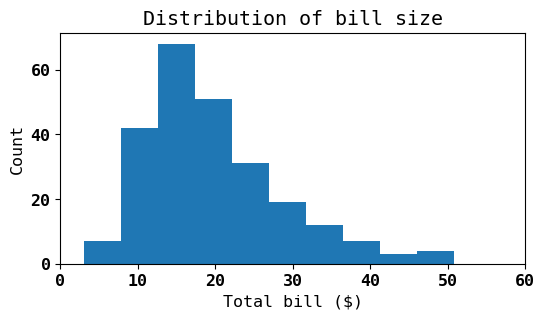

In [10]:
props = {
    'title': 'Distribution of bill size',
    'xlabel': 'Total bill ($)',
    'ylabel': 'Count',
    'xlim': [0, 60]
}

fig, ax = plt.subplots()
ax.set(**props)
ax.hist(tb)

ax.plot()

# VIDEO 2: Plotting One Variable

## The Kernel Density Plot (I/IV)
Let's now try with Seaborn and no customization:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

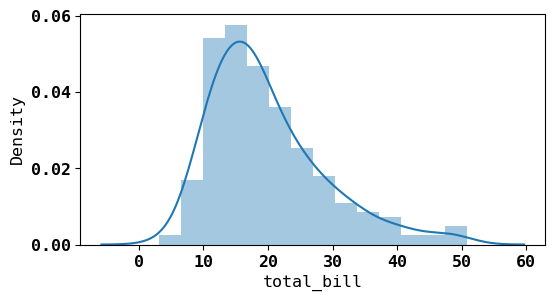

In [11]:
sns.distplot(tb,hist=True)

## The Kernel Density Plot (II/IV)
Quite useful, right? Let's customize this a bit too...

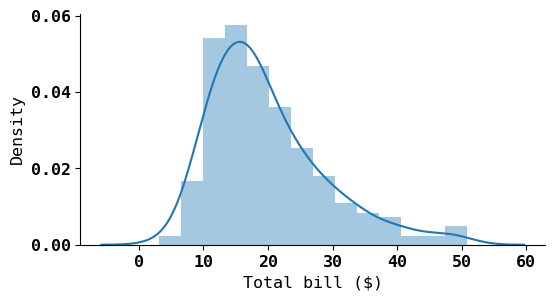

In [12]:
ax = sns.distplot(tb,hist=True)
ax.set(xlabel='Total bill ($)')
sns.despine()

## The Kernel Density Plot (III/IV)
We can also easily plot the cumulative distribution. Customization...

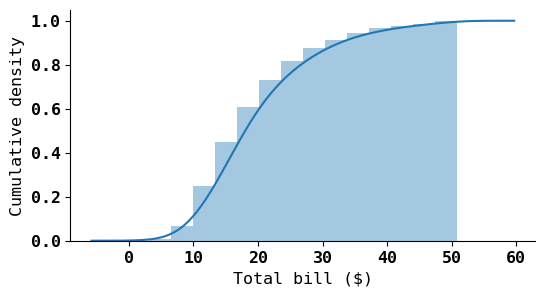

In [13]:
ax = sns.distplot(tb, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}) 
ax.set(xlabel='Total bill ($)', ylabel='Cumulative density')
sns.despine()

## The Kernel Density Plot (IV/IV)
There are still many things that we can play around with such as...
- Thickness?
- Color? 
- Showing raw data? 
- Make KDE plot by subgroups? (exercise)

Try and play around with this when you have time!

## Plotting One Categorical Variable (I/II)

Before, we plotted the *distribution* of a *numeric* variable.

Suppose we have data on gender. What does the distribution look like in the data?

Pie chart? Unfortunately, not possible with Seaborn...

<AxesSubplot:xlabel='time', ylabel='count'>

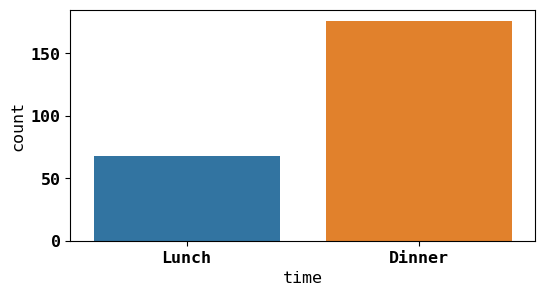

In [14]:
sns.countplot(x='time', data=tips)

## Plotting One Categorical Variable (II/II)

That was not very informative. You might as well just present the actual numbers.

Luckily, this works for `matplotlib`:

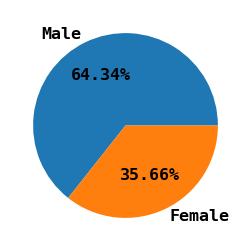

In [15]:
sizes =  tips.groupby('sex')['sex'].count() # Get size of different groups

fig, ax = plt.subplots()
ax.pie(sizes, labels=['Male', 'Female'], autopct='%1.2f%%')  # Make pie representation
plt.show()

## Wrapping Up on One Variable

How did our tools perform? 

- Matplotlib is good for customization (explanatory plots)
- Seaborn and Pandas are good quick and dirty plots (exploratory)

Certain things are cumbersome in one package and straighforward in another!

# VIDEO 3: Plotting Multiple Variables

## Two Numeric Variables (I/IX)
*Now, how do we plot two numeric variables?*

If we do not have too many observations, we can make a point cloud, i.e. a scatter plot.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(x=tips['total_bill'], y=tips['tip'])
ax.set(xlabel='Total bill ($)', ylabel='Tips ($)')

## Two Numeric Variables (III/IX)
*What happens if we do have 'too' many observations?*

Simulate some data...

In [ ]:
X = np.random.normal(0, 1, size=(2*10**4, 1))
Y = 2*X+0.5*np.random.normal(0, 1, size=(2*10**4, 1))

data = np.concatenate((Y,X),axis=1)
df= pd.DataFrame(data, columns=['Y','X'])

## Two Numeric Variables (IV/IX)
... and display!

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sizes=0
for i in range(0,2):
    for j in range(0,2):
        sizes=sizes+1
        axes[i, j].scatter(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes])
plt.subplots_adjust(wspace=0.05, hspace=0.15)

## Two Numeric Variables (V/IX)

If you insist on making a scatter plot, you can change the size of the scatters...

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sizes=0
for i in range(0,2):
    for j in range(0,2):
        sizes=sizes+1
        axes[i, j].scatter(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes], s=10**1.5/(10**(sizes-1)))
plt.subplots_adjust(wspace=0.05, hspace=0.15)

## Two Numeric Variables (VI/IX)

And you can also tweek the opacity:

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sizes=0
for i in range(0,2):
    for j in range(0,2):
        sizes=sizes+1
        axes[i, j].scatter(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes],
                           s=10**1.5/(10**(sizes-1)), alpha=0.2**((sizes-1)/2))
plt.subplots_adjust(wspace=0.05, hspace=0.15)

## Two numeric variables (VII/IX)
*How might we alter the scatter plot?*

We can interpolate the data and jointly plot the marginal and joint distribution:

In [ ]:
ax = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', size=4) # hex, reg, resid
ax.set_axis_labels('Total bill ($)', 'Tips ($)')

## Two numeric variables (VIII/IX)
In spite being fairly slow, this can be particularly useful with moderately large data sets:

In [ ]:
sizes=4
sns.jointplot(x=df['X'][:2*10**sizes], y=df['Y'][:2*10**sizes], kind='kde', size=4) # hex

## Two numeric variables (IX/IX)
*What if we want to see the linear relationship?*

We use the linear model plot:

In [ ]:
ax = sns.lmplot(x='total_bill', y='tip', data=tips, size=3, aspect=2.5) 
ax.set(xlabel='Total bill ($)', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (I/VI)

*How might we use categorical variables?*

- We can split data and make plots based on subsets of data!

## Mixed: Categorical and Numeric Variables (II/VI)

*Can we say anything about gender-specific tipping behavior?*

- One simple way of getting an idea of the core traits of your data is to use the `catplot`

In [ ]:
ax = sns.catplot(x="sex", y="tip", kind="swarm", data=tips, size=3)
ax.set(xlabel='Sex', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (III/VI)

We can add a third dimension to this...

In [ ]:
ax = sns.catplot(x="sex", y="tip", hue="time", kind="swarm", data=tips, size=3)
ax.set(xlabel='Sex', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (IV/VI)

And even utilize a kernel to smooth the (conditional) distributions!

In [ ]:
ax = sns.violinplot(x='time', y='tip', data=tips, hue='sex')
ax.set(xlabel='Time', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (V/VI)

We can also directly assess whether the mean tipping behavior is different conditional on tipping

In [ ]:
ax = sns.barplot(x='time', y='tip',  data=tips, hue='sex') 
ax.set(xlabel='Time', ylabel='Tips ($)')

## Mixed: Categorical and Numeric Variables (VI/VI)

Now, combining two continuous variables with one categorical

In [ ]:
ax = sns.lmplot('total_bill', 'tip', hue='sex', data=tips, size=3)
ax.set(xlabel='Total Bill ($)', ylabel='Tips ($)')

## Advanced exploratory plotting 

*How can we plot the relationship for more than two numeric variables?*

In [ ]:
sns.pairplot(tips, height=2.3, size=1.4) # make hist and scatter for all